# Stack Overflow Dataset
In this notebook, we'll begin by performing some preliminary work on a Stack Overflow dataset found from the Kaggle platform. [(Link to dataset on Kaggle)](https://www.kaggle.com/datasets/aishu200023/stackindex) 

## Notebook Setup

In [1]:
# Importing the necessary Python libraries
import pandas as pd

In [2]:
# Loading in the Stack Overflow (SO) dataset as df
df = pd.read_csv('../data/MLTollsStackOverflow.csv')

In [3]:
# Viewing the first few rows of the dataset
df.head()

,month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
0,09-Jan,0,0,0,631,8,6,2,19,8,...,0,1,0,0,5,0,0,5,0,0
1,09-Feb,1,0,0,633,9,7,3,27,4,...,0,0,0,0,5,0,0,11,0,0
2,09-Mar,0,0,0,766,4,4,2,24,3,...,0,0,0,0,7,0,0,2,0,0
3,09-Apr,0,0,0,768,12,6,3,32,10,...,0,0,0,0,11,0,0,5,0,0
4,09-May,1,0,0,1003,2,7,2,42,7,...,0,0,0,0,10,0,0,3,0,0


In [4]:
# Viewing general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  132 non-null    object 
 1   nltk                   132 non-null    int64  
 2   spacy                  132 non-null    int64  
 3   stanford-nlp           132 non-null    int64  
 4   python                 132 non-null    int64  
 5   r                      132 non-null    int64  
 6   numpy                  132 non-null    int64  
 7   scipy                  132 non-null    int64  
 8   matlab                 132 non-null    int64  
 9   machine-learning       132 non-null    int64  
 10  pandas                 132 non-null    int64  
 11  pytorch                132 non-null    int64  
 12  keras                  132 non-null    int64  
 13  nlp                    132 non-null    int64  
 14  apache-spark           132 non-null    int64  
 15  hadoop

## Converting the Dataset from Wide to Long Format
By default, this dataset manifests in what is referred to as a **wide format**. The first thing we will do is convert the DataFrame into what is referred to as the **long format**. We can do this with the Pandas `melt()` function. In the cell below, melt function takes in 4 parameters: the original DataFrame, a new identification variable (`id_vars`), the name we will give to the variable containing all other columns in the current wide format (`var_name`), and a final column representing the value associated to the feature in is current wide format (`value_name`).

In [5]:
# Converting dataset from wide format to long format
df_long = pd.melt(df, id_vars = 'month', var_name = 'topic', value_name = 'questions')

Let's now convert the data types of the `month` and `topic` features appropriately. The reason we want to convert the `topic` feature into a `category` data type is because it is less memory intensive this way.

In [6]:
# Converting the "month" feature into an appropriate "datetime" data type
df_long['month'] = pd.to_datetime(df_long['month'], format = "%y-%b")

# Converting the "topic" feature into an appropriate "category" data type
df_long['topic'] = df_long.topic.astype('category')

Time-series data becomes easier to work wtih if you choose to use custom indices. Let's do that in the next cell.

In [7]:
# Re-indexing our data based on month and then topic
df_long = df_long.set_index(['month', 'topic']).sort_index()

In [8]:
# Viewing a piece of the re-indexed data at a specific location
df_long.loc[('2009-02-01', 'nltk'), 'questions']

1.0

In [9]:
# Viewing a slice of the re-indexed data with a provided date range
df_long.loc['2009-02-01':'2009-06-01', 'nltk', :]['questions']

month       topic
2009-02-01  nltk     1.0
2009-03-01  nltk     0.0
2009-04-01  nltk     0.0
2009-05-01  nltk     1.0
2009-06-01  nltk     0.0
Name: questions, dtype: float64

In [10]:
# Viewing the current output so far
df_long.head(10)

questions
month      topic                       
2009-01-01 AllenNLP                 0.0
           Apache                  95.0
           Apache-spark-mlib        0.0
           BeautifulSoup            5.0
           Colab                    0.0
           Conda                    0.0
           Dask                     0.0
           FastText                 0.0
           Flair                    0.0
           Gensim                   0.0

## Chaining Methods Together
Now that we have completed the work so far as separate cells, let's see how we can chain them all together using Pandas' `pipe()` and `assign()` functions. The `pipe()` function is very similar to Linux's pipe character (`|`) as it essentially pipes the outputs of one command as inputs to the next. The `assign()` function returns a new dataframe object with all the original columns in addition to new ones that have been appropriately altered. In our case, we are altering the data types of the `month` and `topic` features appropriately.

In [11]:
# Import Jupyter's "display" functionality to view the outputted results appropriately
from IPython.display import display

# Performing all the same actions above except chained together
df = (
    pd.read_csv('../data/MLTollsStackOverflow.csv')
    .pipe(lambda df: pd.melt(df, id_vars = 'month', var_name = 'topic', value_name = 'questions'))
    .assign(
        month = lambda df: pd.to_datetime(df['month'], format = '%y-%b'),
        topic = lambda df: df['topic'].astype('category')
    )
    .pipe(lambda df: display(df) or df)
    .set_index(['month', 'topic'])
    .sort_index()
    .pipe(lambda df: display(df) or df)
)

,month,topic,questions
0,2009-01-01,nltk,0.0
1,2009-02-01,nltk,1.0
2,2009-03-01,nltk,0.0
3,2009-04-01,nltk,0.0
4,2009-05-01,nltk,1.0
...,...,...,...
10687,2019-08-01,azure-virtual-machine,25.0
10688,2019-09-01,azure-virtual-machine,16.0
10689,2019-10-01,azure-virtual-machine,19.0
10690,2019-11-01,azure-virtual-machine,19.0


questions
month      topic                       
2009-01-01 AllenNLP                 0.0
           Apache                  95.0
           Apache-spark-mlib        0.0
           BeautifulSoup            5.0
           Colab                    0.0
...                                 ...
2019-12-01 spacy                   72.0
           stanford-nlp            13.0
           stanford-nlp.1          13.0
           tensorflow            1392.0
           time-series            185.0

[10692 rows x 1 columns]

## Data Visualization
Let's now move into visualizing the data in the next set of cells. In the immediate next cell, we will make use of Pandas' `unstack()` function to essentially un-pivot our DataFrame prior to visualizing it.

In [12]:
# Viewing the unstacked data prior to visualizing it
df.unstack()

questions                                                       \
topic       AllenNLP Apache Apache-spark-mlib BeautifulSoup  Colab  Conda   
month                                                                       
2009-01-01       0.0   95.0               0.0           5.0    0.0    0.0   
2009-02-01       0.0  114.0               0.0           4.0    0.0    0.0   
2009-03-01       0.0  104.0               0.0           8.0    0.0    0.0   
2009-04-01       0.0  111.0               0.0           3.0    0.0    0.0   
2009-05-01       0.0  127.0               0.0          14.0    0.0    0.0   
...              ...    ...               ...           ...    ...    ...   
2019-08-01       0.0  388.0              16.0         322.0   91.0   91.0   
2019-09-01       1.0  435.0              28.0         330.0  103.0  103.0   
2019-10-01       0.0  402.0              21.0         350.0  120.0  120.0   
2019-11-01       2.0  407.0              16.0         376.0  108.0  108.0   
2019-12-01       0.0  439.0              16.0         315.0  125.0  125.0   

                                        ...                                 \
topic       Dask FastText Flair Gensim  ... regression scikit-learn  scipy   
month                                   ...                                  
2009-01-01   0.0      0.0   0.0    0.0  ...        1.0          0.0    2.0   
2009-02-01   0.0      0.0   0.0    0.0  ...        3.0          0.0    3.0   
2009-03-01   0.0      0.0   0.0    0.0  ...        0.0          0.0    2.0   
2009-04-01   0.0      0.0   0.0    0.0  ...        0.0          0.0    3.0   
2009-05-01   0.0      0.0   0.0    0.0  ...        2.0          0.0    2.0   
...          ...      ...   ...    ...  ...        ...          ...    ...   
2019-08-01  66.0      6.0   0.0   30.0  ...       60.0        323.0  212.0   
2019-09-01  73.0     14.0   0.0   30.0  ...       76.0        324.0  135.0   
2019-10-01  73.0     15.0   0.0   27.0  ...      125.0        415.0  188.0   
2019-11-01  91.0     10.0   2.0   42.0  ...      137.0        412.0  199.0   
2019-12-01  77.0      9.0   0.0   30.0  ...      134.0        439.0  159.0   

                                                                        \
topic      scrapy seaborn spacy stanford-nlp stanford-nlp.1 tensorflow   
month                                                                    
2009-01-01    0.0     0.0   0.0          0.0            0.0        0.0   
2009-02-01    0.0     0.0   0.0          0.0            0.0        0.0   
2009-03-01    0.0     0.0   0.0          0.0            0.0        0.0   
2009-04-01    0.0     0.0   0.0          0.0            0.0        0.0   
2009-05-01    0.0     0.0   0.0          0.0            0.0        0.0   
...           ...     ...   ...          ...            ...        ...   
2019-08-01  205.0   119.0  76.0         24.0           22.0     1332.0   
2019-09-01  146.0    90.0  62.0         16.0           15.0     1217.0   
2019-10-01  165.0   130.0  79.0         27.0           27.0     1468.0   
2019-11-01  176.0   133.0  79.0         14.0           14.0     1513.0   
2019-12-01  140.0   112.0  72.0         13.0           13.0     1392.0   

                        
topic      time-series  
month                   
2009-01-01         1.0  
2009-02-01         2.0  
2009-03-01         1.0  
2009-04-01         0.0  
2009-05-01         0.0  
...                ...  
2019-08-01       141.0  
2019-09-01       156.0  
2019-10-01       203.0  
2019-11-01       182.0  
2019-12-01       185.0  

[132 rows x 81 columns]

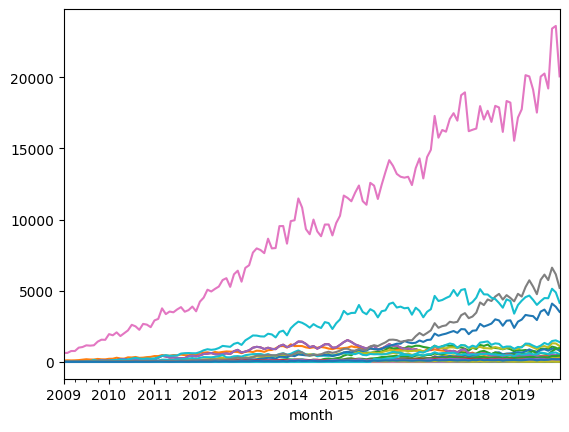

In [13]:
# Unstacking and visualizing the full dataset (hiding the legend as it yields too many results)
df.unstack().plot(legend = False);

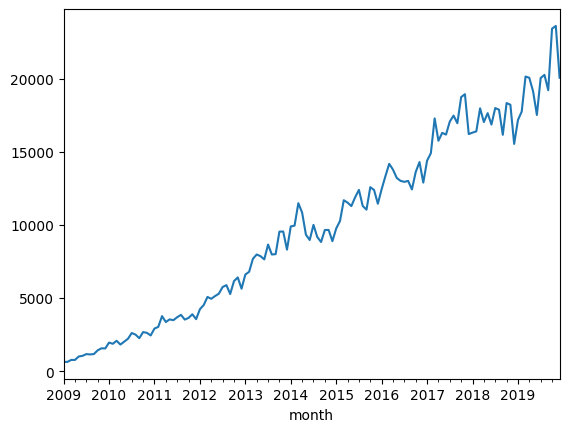

In [14]:
# Visualizing the dataset just for the topic of "python"
df.unstack()['questions']['python'].plot();

Let's now massage the data to view it at a yearly level instead of the current timetable it is defaulted to.

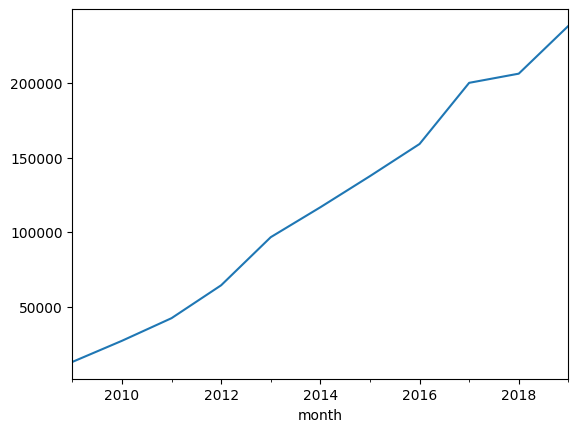

In [15]:
# Grabbing a temporary copy of the original dataset
df_tmp = df.unstack()

# Aggregating the data at a yearly level
df_yearly = df_tmp.groupby(pd.Grouper(freq = '1Y')).sum()

# Visualizing the data for the topic of Python at a yearly level
df_yearly['questions']['python'].plot();

## Handling Gaps in Time Series Datasets
As working with real data can be messy, we'll often find that there are missing gaps in time, which means we have to properly address filling these gaps. This can be done with Pandas' `reindex()` function. To simulate this with our own dataset here, we will be extending the date range six months beyond what is currently available.

In [ ]:
# Getting the earliest date in the current date range
min_date = df.index.get_level_values('month').min()

# Getting the latest date and extending it out 6 months for simulation purposes
max_date = df.index.get_level_values('month').max() + pd.Timedelta(days = 31 * 6)

# Printing out the dates
print(f'Earliest date: {min_date}')
print(f'Latest date after 6 month add: {max_date}')

In [ ]:
# Setting a date range that spans the full timeframe between min_date and max_date
dates_to_select = pd.date_range(min_date, max_date, freq = '1MS')

# Getting the unique values representing each individual topic
topics = df.index.get_level_values('topic').unique()

In [ ]:
# Getting all the combinations of our new dates and topics
index_to_select = pd.MultiIndex.from_product([dates_to_select, topics], names = ['month', 'topic'])

In [ ]:
# Visualizing the "python" topics once again with our new index
df.reindex(index_to_select).unstack()['questions']['python'].plot();